# Aim: To see the effect of distnace of star in the red fraction of the star

In [1]:
# importing all necessary library

from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
# importing csv file of 1m sources containing Gaia data for plotting HR diagram
filename = '1M.csv'
df1 = pd.read_csv(filename)

# filtering data on the basis of parallax error so that we can get better observed sources
df = df1[df1['parallax_error']< 0.1]
df = df.reset_index(drop=True)
# extracting the value of G-K filter
g_k_1m = df['phot_g_mean_mag'] - df['ks_m']

## $\textbf{Considering only those stars which are in "external.gaiaedr3\_distance" table }$

In [3]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_gaia_result(query_size, ra_obj, dec_obj, radius_deg):
    #from astroquery.gaia import Gaia

    query = """SELECT TOP {}""".format(query_size) + """
        g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_geo, d3.r_med_photogeo, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
        w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tt.j_m, tt.h_m, tt.ks_m
        FROM gaiadr2.gaia_source as g, gaiadr2.allwise_best_neighbour as x, allwise_original_valid as w, gaiadr2.tmass_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
        g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND ((g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.tmass_oid = tt.tmass_oid)) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result

### Testing our defined function and getting gaia result around a herbig star

In [4]:
herbig_test = get_gaia_result(1000, 193.3217131, -77.1196488, 12./60.)
herbig_test = herbig_test[herbig_test['parallax_error'] < 0.3]

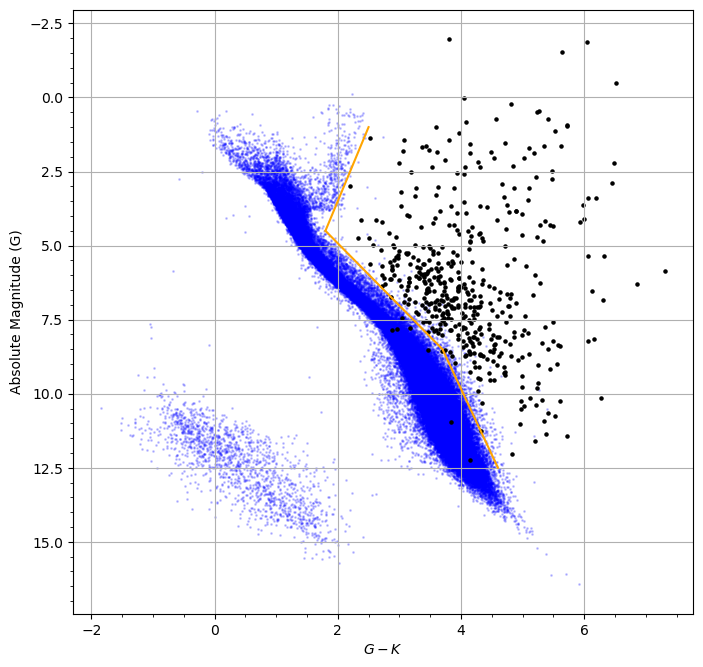

In [5]:
# getting Absolute and G - K filter value for all stars

her_gk = herbig_test['phot_g_mean_mag'] - herbig_test['ks_m']
her_mg = herbig_test['mv']



# Defining tand her_mg[i] < 12.5he equation of straight line for the boundries

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

def equation1(y):
    # y = 1 - 5 * (x - 2.5)
    x = 2.5 - 1.0/5.0 * (y - 1)
    return x

def equation2(y):
    # y = 4.5 + 4.0/1.9 * (x - 1.8)
    x = 1.8 + 1.9/4.0 * (y - 4.5)
    return x

def equation3(y):
    #y = 8.5 + 40/9 * (x - 3.7)
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    return x

# defining the limit of absolute magnitude just for plotting the boundries line
y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 12.5, 100)

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

# Plotting HR diagram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8), dpi = 100)
ax.set_xlabel(r"$G - K$")
ax.set_ylabel("Absolute Magnitude (G)", fontsize = 10)

# Plotting the HR diagram for 1M sources
ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')

# plotting the lines using just two points 
# ax.plot([1.8, 2.5], [4.5, 1], color = 'red')
# ax.plot([1.8, 3.7], [4.5, 8.5], color = 'red')
# ax.plot([3.7, 4.6], [8.5, 12.5], color = 'red')

# plotting the boundries using the eqaution of straight line
ax.plot(equation1(y_values1), y_values1,  color = 'orange')
ax.plot(equation2(y_values2), y_values2,  color = 'orange')
ax.plot(equation3(y_values3), y_values3, color = 'orange')

# plotting/Placing herbig's surrounding stars in HR diagram(CMD)
ax.scatter(her_gk, her_mg, marker='o', color = 'k', s = 5, label = 'HAeBe')

ax.minorticks_on()
ax.grid(True)
ax.set_ylim(max(df.mg)+1, min(her_mg) -1)
plt.show()


### Counting function

In [6]:
# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate 

def counting_fun(her_mg, her_gk):

    count_red = 0

    for i in range(len(her_mg)):

        if her_mg[i] <= 4.5:
            if her_gk[i] >= equation1(her_mg[i]):
                count_red = count_red + 1
        
        if 4.5 < her_mg[i] and her_mg[i] <= 8.5:
            if her_gk[i] >= equation2(her_mg[i]):
                count_red = count_red + 1

        if 8.5 < her_mg[i]:
            if her_gk[i] >= equation3(her_mg[i]):
                count_red = count_red + 1


    return count_red

In [7]:
n_star = counting_fun(her_mg, her_gk)
print("total no of red star = {}".format(n_star))

print(len(her_gk), len(her_mg))
print("Fraction of red star ={}".format(n_star/len(her_gk)))

total no of red star = 454
464 464
Fraction of red star =0.978448275862069


### For a random star, finding all the surrounding star and counting them

In [8]:
rand_star = get_gaia_result(1000, 72.77801742, 0.546141291, 12./60.)
rand_star = rand_star[rand_star['parallax_error']< 0.3]
rand_gk = rand_star['phot_g_mean_mag'] - rand_star['ks_m']
rand_mg = rand_star['mv']
n_star = counting_fun(rand_mg, rand_gk)
n_star

33

### Plotting these random star in HR diagram

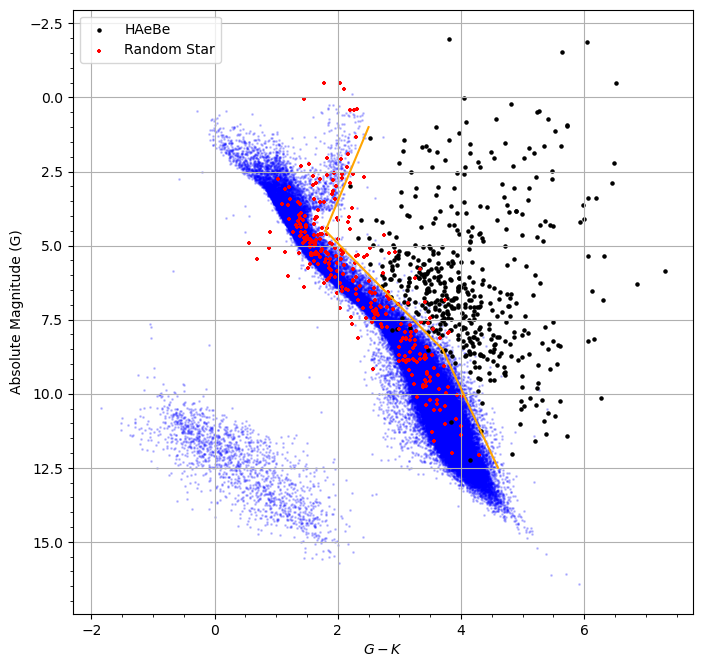

In [9]:
# getting Absolute and G - K filter value for all stars
her_gk = herbig_test['phot_g_mean_mag'] - herbig_test['ks_m']
her_mg = herbig_test['mv']

# Defining the equation of straight line for the boundries

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------


def equation1(y):
    # y = 1 - 5 * (x - 2.5)
    x = 2.5 - 1.0/5.0 * (y - 1)
    return x

def equation2(y):
    # y = 4.5 + 4.0/1.9 * (x - 1.8)
    x = 1.8 + 1.9/4.0 * (y - 4.5)
    return x

def equation3(y):
    #y = 8.5 + 40/9 * (x - 3.7)
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    return x


#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------


y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 12.5, 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8), dpi = 100)
ax.set_xlabel(r"$G - K$")
ax.set_ylabel("Absolute Magnitude (G)")
ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')

# ax.plot([1.8, 2.5], [4.5, 1], color = 'red')
# ax.plot([1.8, 3.7], [4.5, 8.5], color = 'red')
# ax.plot([3.7, 4.6], [8.5, 12.5], color = 'red')


# Drawing the boundary line
ax.plot(equation1(y_values1), y_values1,  color = 'orange')
ax.plot(equation2(y_values2), y_values2,  color = 'orange')
ax.plot(equation3(y_values3), y_values3, color = 'orange')


# for herbig star
ax.scatter(her_gk, her_mg, marker='o', color = 'k', s = 5, label = 'HAeBe')
# for random star
ax.scatter(rand_gk, rand_mg, marker='+', color = 'red', s = 5, label = 'Random Star')

ax.minorticks_on()
ax.grid(True)
ax.legend()
ax.set_ylim(max(df.mg)+1, min(her_mg) -1)
plt.show()


### Importing 20 random Ae/Be stars and 20 Random stars

In [10]:
# importing 20 Herbig Stars

herbig_list = pd.read_csv("Herbig20.csv")
herbig_20 = herbig_list[["Name", "RAICRS", "DEICRS", "Dist"]]
herbig_20 = herbig_20.sort_values(by = 'Dist') 
herbig_20 = herbig_20.reset_index(drop=True)


# taking 20 random stars from Gaia Database
randstar_20 = pd.read_csv("random22.csv")


In [11]:
randstar_20

,source_id,ra,dec,parallax,parallax_error,r_med_geo,r_med_photogeo,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
0,1421428123921969536,265.500670,57.037785,1.771803,0.009142,551.20720,550.87060,13.068459,13.381676,12.596739,0.784937,4.310536,11.687,11.717,11.510,9.750,12.049,11.720,11.736
1,4653986124831923456,65.803654,-71.690995,1.289846,0.009311,752.52410,752.64020,13.183333,13.493254,12.709017,0.784237,3.736024,11.785,11.806,11.601,9.155,12.131,11.873,11.823
2,2159226883158029952,271.239329,61.771907,3.943005,0.009389,250.82490,250.82062,13.196609,13.749046,12.515802,1.233244,6.175745,11.039,11.119,10.908,9.009,11.680,11.189,11.098
3,2293637128772067840,280.774405,78.096764,2.321574,0.009426,424.73572,424.86610,13.188673,13.596359,12.627187,0.969172,5.017585,11.448,11.470,11.417,9.618,11.935,11.570,11.515
4,4760504303069565056,79.352563,-61.915871,3.634955,0.009430,273.49863,273.53613,13.186937,13.661277,12.568212,1.093065,5.989433,11.205,11.247,11.205,10.127,11.818,11.418,11.272
5,5278259449510557824,91.845779,-71.863904,0.224943,0.009441,3782.16550,3738.43730,13.193015,13.806603,12.453834,1.352770,-0.046626,10.655,10.736,10.656,9.863,11.485,10.917,10.789
6,5285214204149802112,104.173372,-64.801168,1.156184,0.009463,836.11426,837.77890,13.237310,13.516376,12.805569,0.710807,3.552446,11.966,12.008,11.791,8.858,12.320,12.101,12.071
7,5496901666015915776,101.556754,-55.464688,0.536449,0.009479,1714.80980,1713.84340,13.101081,13.676964,12.390030,1.286934,1.748724,10.700,10.765,10.677,9.363,11.429,10.903,10.770
8,2151854898212606464,272.821076,57.766109,2.691799,0.009515,363.51498,363.33392,13.584837,14.044125,12.984699,1.059425,5.735050,11.716,11.767,11.767,9.400,12.289,11.867,11.804
9,4761339244711034624,78.641164,-59.687983,0.944961,0.009525,1025.83570,1024.38040,13.206351,13.548652,12.702763,0.845889,3.083420,11.664,11.708,11.663,9.215,12.106,11.760,11.701


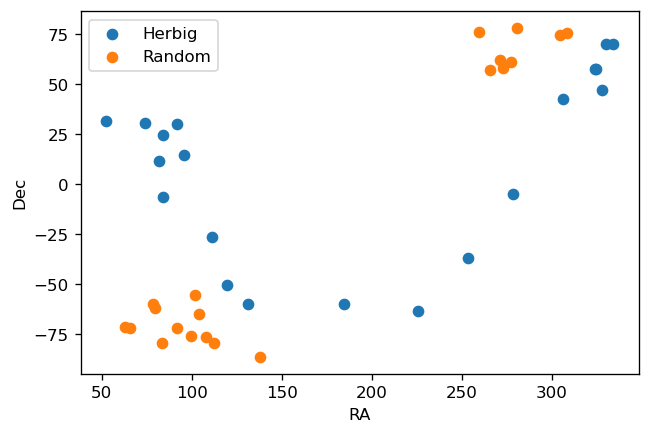

In [12]:
plt.figure(dpi = 120)
plt.scatter(herbig_20.RAICRS, herbig_20.DEICRS, label = 'Herbig')
plt.scatter(randstar_20.ra, randstar_20.dec, label = 'Random')
plt.legend()
plt.ylabel("Dec")
plt.xlabel("RA")
plt.show()


### # Plotting all 20 Herbig Ae/Be stars and 20 random stars in galactic coordinate system

In [13]:
one_coord = SkyCoord(df.ra, df.dec, unit = (u.deg, u.deg))
herb_coord= SkyCoord(herbig_20.RAICRS, herbig_20.DEICRS, unit = (u.deg, u.deg))
rand_coord = SkyCoord(randstar_20.ra, randstar_20.dec, unit = (u.deg, u.deg))


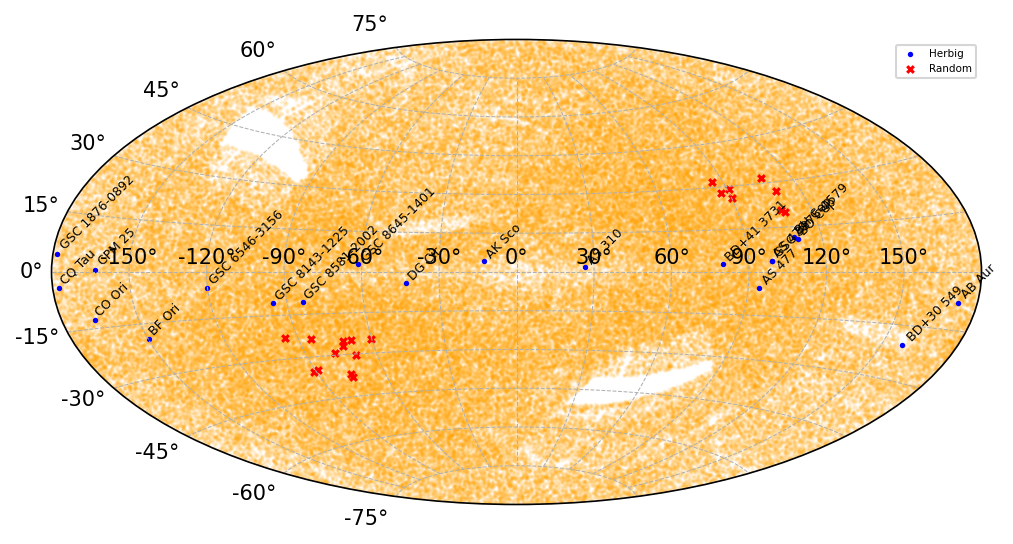

In [14]:
# Converting to galactic coordinate in degrees

one_gal = one_coord.transform_to('galactic')
herb_gal = herb_coord.transform_to('galactic')
rand_gal = rand_coord.transform_to('galactic')


l_one = one_gal.l.radian
l_one[l_one > np.pi] -= 2.0*np.pi
b_one = one_gal.b.radian


l_herb = herb_gal.l.radian
l_herb[l_herb > np.pi] -= 2.0*np.pi
b_herb = herb_gal.b.radian


l_rand = rand_gal.l.radian
l_rand[l_rand > np.pi] -= 2.0*np.pi
b_rand = rand_gal.b.radian


fig = plt.figure(figsize = [8, 5], dpi = 150)
ax = fig.add_subplot(1, 1, 1, projection='aitoff')
ax.scatter(l_one, b_one, s = 1, color = 'orange', alpha = 0.1 )
ax.scatter(l_herb, b_herb, s = 10, color ='blue', marker = '.', label = 'Herbig')
ax.scatter(l_rand, b_rand, s = 10, color = 'red', marker = "x", label = 'Random')
for i in range(len(l_herb)):
    ax.text(l_herb[i], b_herb[i]+ 0.02, '{}'.format(herbig_20.Name[i]), fontsize = 6, rotation = 45)
ax.legend(fontsize = 5)
ax.minorticks_on()
ax.grid(True, linewidth = 0.5, linestyle = '--')
# plt.savefig('posi.pdf', dpi = 500)
plt.show()

### defing a function to get the corresponding search radius for a distance star

Assuming "Orion Nebula" as base distance = 412 pc and radius = 12 ly = 3.679 pc, this leads to angular size = 30.7 arcminute.

Our search radius = 6.0 arcminute

In [15]:
def get_arc_min(dist_star_pc):
    theta_ini = 12.0 # In arcminute
    # dd = get_distance_of_single(5788943567946493312)  # In parsec
    # dist_ini = float(dd['r_med_geo'])
    dist_ini = 412   # In parsec
    theta_star = (dist_ini * theta_ini)/dist_star_pc

    return theta_star       # it returns parallax in arcminute

### Getting distance of a star using source_id from "external.gaiadr3_distance" catalog

In [16]:
# For single gaia object
def get_distance_of_single(source_id):
    
    query = """ SELECT g.source_id, g.ra, g.dec, d3.r_med_geo, d3.r_med_photogeo
        FROM gaiadr3.gaia_source AS g JOIN external.gaiaedr3_distance AS d3 ON (g.source_id = d3.source_id)
        WHERE g.source_id in ({})""".format(source_id)

    job = Gaia.launch_job(query)
    res = job.get_results()
        
    return res

In [17]:
dist_star = get_distance_of_single(source_id = randstar_20["source_id"][16])
dist_star = float(dist_star["r_med_geo"])
dist_star

1550.629638671875

In [18]:
dist_star = get_distance_of_single(source_id=randstar_20["source_id"][5])
dist_star = float(dist_star["r_med_geo"])
radius = get_arc_min(dist_star)
dd = get_gaia_result(10000, randstar_20["ra"][5], randstar_20['dec'][5], radius/60.0)

In [19]:
radius

1.3071876321267772

In [20]:
radius
dd = dd[dd["parallax_error"] < 0.3]
dd

source_id,ra,dec,parallax,parallax_error,r_med_geo,r_med_photogeo,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float32
5278259518230032128,91.83650623084445,-71.85348559989255,0.9687108429874387,0.03032634309596386,933.55176,935.6538,16.15675,16.638968,15.52416,1.1148071,6.087720529916581,14.055,14.148,13.368,9.855,14.735,14.229,14.093
5278259483870302720,91.90426938218144,-71.8571859048223,0.00480683307250752,0.0319680892567036,17682.36,23098.402,16.217705,17.058065,15.3238125,1.7342529,-5.3730000240917875,12.979,13.073,11.909,9.753,14.069,13.243,13.085
5278258693596318208,91.86962957960296,-71.88048881347923,0.017005410445046637,0.09338808379363865,6690.183,11418.056,18.022184,18.648563,17.28483,1.3637333,-0.8248800351033267,15.398,15.513,13.639,9.768,16.387,15.499,15.627
5278236046232261632,91.80494632546319,-71.86096169786119,0.36750170339574256,0.07906556860482562,2411.553,2294.3503,17.794867,18.326534,17.098448,1.2280865,5.621163343938431,15.55,15.6,13.206,9.562,16.225,15.424,15.384
5278236256686362624,91.81025409612712,-71.85187780083234,0.6833399962190738,0.019993203256528945,1367.0662,1381.2776,15.059723,15.480452,14.486027,0.9944248,4.232907105049646,13.314,13.378,13.531,9.679,13.797,13.469,13.373
5278259449510557824,91.84577886345247,-71.86390406257885,0.22494267777897234,0.00944147145718732,3782.1655,3738.4373,13.193015,13.806603,12.453834,1.3527699,-0.04662559744872041,10.655,10.736,10.656,9.863,11.485,10.917,10.789
5278259724388463616,91.85450433160013,-71.84352868677976,0.037662872693814096,0.10460725692549486,5508.5107,3828.4792,18.067114,18.727713,17.313972,1.4137402,0.946681087710818,15.492,15.739,13.415,9.285,16.202,15.658,15.576
5278236050527931264,91.77810755977148,-71.86859541956709,0.5952765752400502,0.03488666985994618,1634.6652,1635.8939,16.302818,16.720835,15.736698,0.9841366,5.1764122630543685,14.592,14.665,13.609,9.97,15.009,14.572,14.543


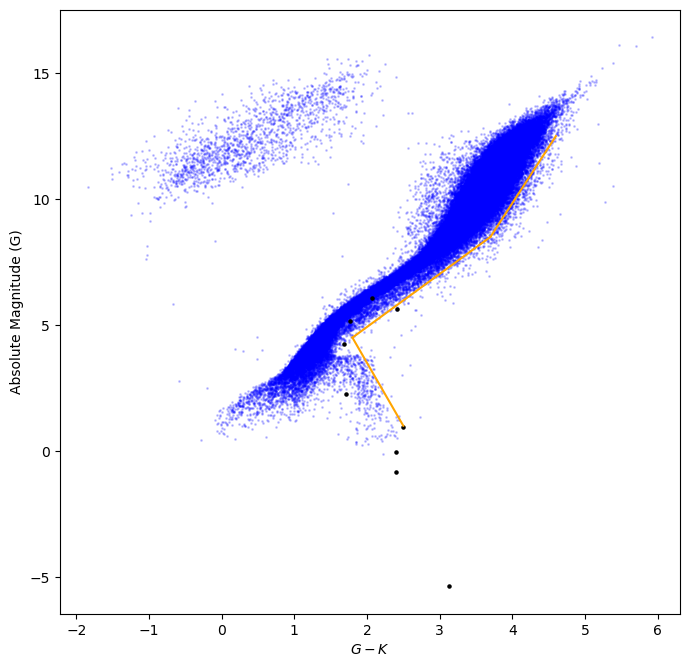

In [21]:
# %matplotlib inline

# Obtaining G-K and Absolute Magnitue (Mv) for Random star and Herbig Ae/Be Star
rand_gk = dd['phot_g_mean_mag'] - dd['ks_m']
rand_mg = dd['mv']

# her_gk = result_her["phot_g_mean_mag"] - result_her['ks_m']
# her_mg = result_her["mv"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8), dpi = 100)


ax.set_xlabel(r"$G - K$")
ax.set_ylabel("Absolute Magnitude (G)", fontsize = 10)

# Plotting the HR diagram for 1M sources
ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')

# plotting the lines using just two points 

# ax.plot([1.8, 2.5], [4.5, 1], color = 'red')
# ax.plot([1.8, 3.7], [4.5, 8.5], color = 'red')
# ax.plot([3.7, 4.6], [8.5, 12.5], color = 'red')

# plotting the boundries using the eqaution of straight line
ax.plot(equation1(y_values1), y_values1,  color = 'orange')
ax.plot(equation2(y_values2), y_values2,  color = 'orange')
ax.plot(equation3(y_values3), y_values3, color = 'orange')

# plotting/Placing herbig's surrounding stars in HR diagram(CMD)
ax.scatter(rand_gk, rand_mg, marker='o', color = 'k', s = 5, label = 'Random')
# ax.scatter(her_gk, her_mg, marker='+', c\vspace{5mm}

In [22]:
n_star = counting_fun(rand_mg, rand_gk)
n_star

1

In [23]:
dd = dd[(dd["r_med_geo"] > 2000)]
dd

source_id,ra,dec,parallax,parallax_error,r_med_geo,r_med_photogeo,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float32
5278259483870302720,91.90426938218144,-71.8571859048223,0.00480683307250752,0.0319680892567036,17682.36,23098.402,16.217705,17.058065,15.3238125,1.7342529,-5.3730000240917875,12.979,13.073,11.909,9.753,14.069,13.243,13.085
5278258693596318208,91.86962957960296,-71.88048881347923,0.017005410445046637,0.09338808379363865,6690.183,11418.056,18.022184,18.648563,17.28483,1.3637333,-0.8248800351033267,15.398,15.513,13.639,9.768,16.387,15.499,15.627
5278236046232261632,91.80494632546319,-71.86096169786119,0.36750170339574256,0.07906556860482562,2411.553,2294.3503,17.794867,18.326534,17.098448,1.2280865,5.621163343938431,15.55,15.6,13.206,9.562,16.225,15.424,15.384
5278259449510557824,91.84577886345247,-71.86390406257885,0.22494267777897234,0.00944147145718732,3782.1655,3738.4373,13.193015,13.806603,12.453834,1.3527699,-0.04662559744872041,10.655,10.736,10.656,9.863,11.485,10.917,10.789
5278259724388463616,91.85450433160013,-71.84352868677976,0.037662872693814096,0.10460725692549486,5508.5107,3828.4792,18.067114,18.727713,17.313972,1.4137402,0.946681087710818,15.492,15.739,13.415,9.285,16.202,15.658,15.576
5278258723659533440,91.88661689749958,-71.87565951513298,0.0703590743631981,0.09047952937474349,6636.959,5384.8613,18.015945,18.38796,17.494898,0.8930626,2.2525460210159345,16.19,16.454,13.55,9.544,16.675,16.748,16.299


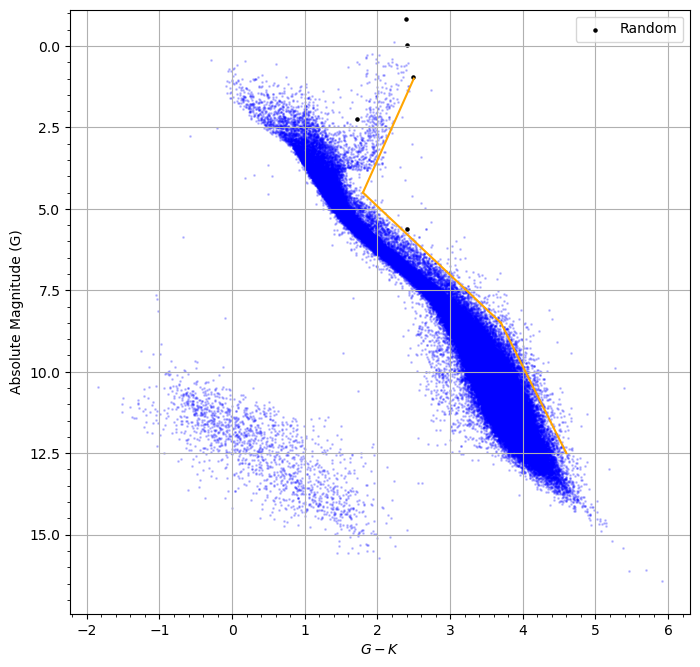

In [24]:
# %matplotlib inline

# Obtaining G-K and Absolute Magnitue (Mv) for Random star and Herbig Ae/Be Star
rand_gk = dd['phot_g_mean_mag'] - dd['ks_m']
rand_mg = dd['mv']

# her_gk = result_her["phot_g_mean_mag"] - result_her['ks_m']
# her_mg = result_her["mv"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8), dpi = 100)


ax.set_xlabel(r"$G - K$")
ax.set_ylabel("Absolute Magnitude (G)", fontsize = 10)

# Plotting the HR diagram for 1M sources
ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')

# plotting the lines using just two points 

# ax.plot([1.8, 2.5], [4.5, 1], color = 'red')
# ax.plot([1.8, 3.7], [4.5, 8.5], color = 'red')
# ax.plot([3.7, 4.6], [8.5, 12.5], color = 'red')

# plotting the boundries using the eqaution of straight line
ax.plot(equation1(y_values1), y_values1,  color = 'orange')
ax.plot(equation2(y_values2), y_values2,  color = 'orange')
ax.plot(equation3(y_values3), y_values3, color = 'orange')

# plotting/Placing herbig's surrounding stars in HR diagram(CMD)
ax.scatter(rand_gk, rand_mg, marker='o', color = 'k', s = 5, label = 'Random')
# ax.scatter(her_gk, her_mg, marker='+', color = 'r', s = 5, label = 'HAeBe')

ax.minorticks_on()
ax.grid(True)
ax.legend()
ax.set_ylim(max(df.mg)+1, min(df.mg) -1)
plt.show()

In [25]:
n_star = counting_fun(rand_mg, rand_gk)
n_star

1

### Defining boundary lines in G vs G-K plot

In [26]:
# Defining the equation of straight line for the boundries
def equation1(y):
    # y = 1 - 5 * (x - 2.5)
    x = 2.5 - 1.0/5.0 * (y - 1)
    return x

def equation2(y):
    # y = 4.5 + 4.0/1.9 * (x - 1.8)
    x = 1.8 + 1.9/4.0 * (y - 4.5)
    return x

def equation3(y):
    #y = 8.5 + 40/9 * (x - 3.7)
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    return x

# defining the limit of absolute magnitude just for plotting the boundries line
y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 12.5, 100)

In [27]:
# Creating a list for storing the total number of stars around a Herbig Ae/Be star

num_tot_star_her = []  
num_red_star_her = []   # For red object around Herbig Ae/Be star
num_tot_star_rand = []  # For toatal star around random star
num_red_star_rand = []  # For red objec around the Random Star




for i in range(len(herbig_20["Dist"])):

    # ------------------------------------------------
    # -----------   RANDOM STAR    -------------------

    # getting distance of star from table external.gaiaedr3_distance
    dist_star = randstar_20["r_med_geo"][i]
    radius_star = get_arc_min(dist_star)    # this will give radius in arc minutes
    result_star = get_gaia_result(10000, randstar_20["ra"][i], randstar_20['dec'][i], radius_star/60.0) # this will give radius in arc minutes 

    # Filter condition
    result_star = result_star[result_star["parallax_error"] < 0.3]


    filter_dist_star = 0.2
    max_dist_star = dist_star + dist_star * filter_dist_star 
    min_dist_star = dist_star - dist_star * filter_dist_star 
    result_star = result_star[(result_star["r_med_geo"] < max_dist_star) & (result_star["r_med_geo"] > min_dist_star)]

    # -----------------------------------------------------
    # -----------   HERBIG Ae/Be STAR    -------------------


    dist_her = herbig_20["Dist"][i]
    radius_her = get_arc_min(dist_star)  # this will give radius in arc minutes
    result_her = get_gaia_result(10000, herbig_20["RAICRS"][i], herbig_20['DEICRS'][i], radius_her/60.0)  # this will give radius in arc minutes
    
    # Filter condition
    result_her = result_her[result_her["parallax_error"] < 0.3]

    
    
    filter_dist_her = 0.2
    max_dist_her = dist_her + dist_her * filter_dist_her 
    min_dist_her = dist_her - dist_her * filter_dist_her 
    result_her = result_her[(result_her["r_med_geo"]<max_dist_her) & (result_her["r_med_geo"]>min_dist_her)]


    # %matplotlib inline

    # Obtaining G-K and Absolute Magnitue (Mv) for Random star and Herbig Ae/Be Star
    rand_gk = result_star['phot_g_mean_mag'] - result_star['ks_m']
    rand_mg = result_star['mv']

    her_gk = result_her["phot_g_mean_mag"] - result_her['ks_m']
    her_mg = result_her["mv"]


    # fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8), dpi = 100)


    # ax.set_xlabel(r"$G - K$")
    # ax.set_ylabel("Absolute Magnitude (G)", fontsize = 10)

    # # Plotting the HR diagram for 1M sources
    # ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')

    # # plotting the lines using just two points 

    # # ax.plot([1.8, 2.5], [4.5, 1], color = 'red')
    # # ax.plot([1.8, 3.7], [4.5, 8.5], color = 'red')
    # # ax.plot([3.7, 4.6], [8.5, 12.5], color = 'red')

    # # plotting the boundries using the eqaution of straight line
    # ax.plot(equation1(y_values1), y_values1,  color = 'orange')
    # ax.plot(equation2(y_values2), y_values2,  color = 'orange')
    # ax.plot(equation3(y_values3), y_values3, color = 'orange')

    # # plotting/Placing herbig's surrounding stars in HR diagram(CMD)
    # ax.scatter(rand_gk, rand_mg, marker='o', color = 'k', s = 5, label = 'Random')
    # ax.scatter(her_gk, her_mg, marker='+', color = 'r', s = 5, label = 'HAeBe')

    # ax.minorticks_on()
    # ax.grid(True)
    # ax.legend()
    # ax.set_ylim(max(df.mg)+1, min(df.mg) -1)
    # plt.show()


    her_red_star = counting_fun(her_mg, her_gk)
    num_tot_star_her.append(len(her_mg))
    num_red_star_her.append(her_red_star)

    """ Counting Red Object around a Random Star"""

    rand_red_star = counting_fun(rand_mg, rand_gk)
    num_tot_star_rand.append(len(rand_mg))
    num_red_star_rand.append(rand_red_star)




In [28]:
print("\n")
print("-------------------------------   For Herbig Star    -----------------------------------")
print("\n")
print("Name of Herbig Star \t No of Red star    Total no of star    Probabaility of red object")
print("-----------------------------------------------------------------------------------------")
for i in range(len(num_red_star_her)):
    
    print(" {:10s}\t". format(herbig_20.loc[i][0]) + "\t \t {:3d}".format(num_red_star_her[i]) + "\t \t{:3d}".format(num_tot_star_her[i]) + "\t \t \t{:0.4f}".format(num_red_star_her[i]/num_tot_star_her[i]))

print("\n")
print(" Average number of red objects around a Herbig Star = ", np.average(num_red_star_her))


print(" ")


print("-----------------------------------------------------------------------------------------")
print("\n")
print("--------------------------------  For Random Star    ------------------------------------")
print("\n")
print("Sl. No. of Random Star \t No of Red star    Total no of star     Probability of red object")
print("------------------------------------------------------------------------------------------")
for i in range(len(num_red_star_her)):
    
    print(" {:2d}\t".format(i) + "\t \t {}\t".format(num_red_star_rand[i]) + "\t \t{}".format(num_tot_star_rand[i]) + "\t \t \t{:0.4f}".format(num_red_star_rand[i]/num_tot_star_rand[i]))

print("\n")

print(" Average number of red objects around a Random Star = ", np.average(num_red_star_rand))



-------------------------------   For Herbig Star    -----------------------------------


Name of Herbig Star 	 No of Red star    Total no of star    Probabaility of red object
-----------------------------------------------------------------------------------------


ZeroDivisionError: division by zero

In [ ]:
randstar_20

,source_id,ra,dec,parallax,parallax_error,r_med_geo,r_med_photogeo,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
0,1421428123921969536,265.500670,57.037785,1.771803,0.009142,551.20720,550.87060,13.068459,13.381676,12.596739,0.784937,4.310536,11.687,11.717,11.510,9.750,12.049,11.720,11.736
1,4653986124831923456,65.803654,-71.690995,1.289846,0.009311,752.52410,752.64020,13.183333,13.493254,12.709017,0.784237,3.736024,11.785,11.806,11.601,9.155,12.131,11.873,11.823
2,2159226883158029952,271.239329,61.771907,3.943005,0.009389,250.82490,250.82062,13.196609,13.749046,12.515802,1.233244,6.175745,11.039,11.119,10.908,9.009,11.680,11.189,11.098
3,2293637128772067840,280.774405,78.096764,2.321574,0.009426,424.73572,424.86610,13.188673,13.596359,12.627187,0.969172,5.017585,11.448,11.470,11.417,9.618,11.935,11.570,11.515
4,4760504303069565056,79.352563,-61.915871,3.634955,0.009430,273.49863,273.53613,13.186937,13.661277,12.568212,1.093065,5.989433,11.205,11.247,11.205,10.127,11.818,11.418,11.272
5,5278259449510557824,91.845779,-71.863904,0.224943,0.009441,3782.16550,3738.43730,13.193015,13.806603,12.453834,1.352770,-0.046626,10.655,10.736,10.656,9.863,11.485,10.917,10.789
6,5285214204149802112,104.173372,-64.801168,1.156184,0.009463,836.11426,837.77890,13.237310,13.516376,12.805569,0.710807,3.552446,11.966,12.008,11.791,8.858,12.320,12.101,12.071
7,5496901666015915776,101.556754,-55.464688,0.536449,0.009479,1714.80980,1713.84340,13.101081,13.676964,12.390030,1.286934,1.748724,10.700,10.765,10.677,9.363,11.429,10.903,10.770
8,2151854898212606464,272.821076,57.766109,2.691799,0.009515,363.51498,363.33392,13.584837,14.044125,12.984699,1.059425,5.735050,11.716,11.767,11.767,9.400,12.289,11.867,11.804
9,4761339244711034624,78.641164,-59.687983,0.944961,0.009525,1025.83570,1024.38040,13.206351,13.548652,12.702763,0.845889,3.083420,11.664,11.708,11.663,9.215,12.106,11.760,11.701


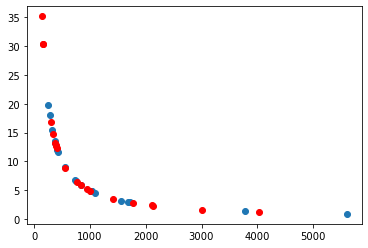

In [ ]:


plt.scatter(randstar_20["r_med_geo"], get_arc_min(randstar_20["r_med_geo"]))
plt.scatter(herbig_20["Dist"], get_arc_min(herbig_20["Dist"]), c = 'r')
plt.show()

In [ ]:
herbig_20.sort_values(by = 'Dist')
herbig_20 = herbig_20.reset_index(drop=True)
herbig_20

,Name,RAICRS,DEICRS,Dist
0,AK Sco,253.686667,-36.888611,140.6
1,AB Aur,73.941250,30.551111,162.9
2,CQ Tau,83.993750,24.748333,163.1
3,BD+30 549,52.332500,31.415833,295.4
4,BH Cep,330.428750,69.743333,335.1
5,BO Cep,334.225417,70.062500,374.5
6,GSC 8143-1225,119.798333,-50.379722,386.3
7,BF Ori,84.305417,-6.583611,388.8
8,CO Ori,81.909583,11.427500,404.0
9,GSC 8581-2002,131.098333,-59.949444,557.6


In [ ]:
%matplotlib inline

def list_red_object(radius):

    num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
    num_red_star_her = []   # For red object around Herbig Ae/Be star
    num_tot_star_rand = []  # For toatal star around random star
    num_red_star_rand = []  # For red objec around the Random Star


    for i in range(len(herbig_20.RAICRS)):
        
        

        herbig_star = get_gaia_result(1000, herbig_20.loc[i][1], herbig_20.loc[i][2], radius)
        # Filtering out stars on the basis of parallax error
        herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
        her_mg = herbig_star["mv"]
        her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

        rand_star = get_gaia_result(1000, randstar_20.loc[i][1], randstar_20.loc[i][2], radius)
        rand_mg = rand_star["mv"]
        rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

        y_values1 = np.linspace(1, 4.5, 50)
        y_values2 = np.linspace(4.5, 8.5, 100)
        y_values3 = np.linspace(8.5, 14.5, 100)


        # fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 100, figsize = (8, 8))
        # ax.set_xlabel(r"$G - K$", fontsize = 9)
        # ax.set_ylabel("Absolute Magnitude (G)", fontsize = 9)
        # ax.scatter(g_k_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')
        # ax.scatter(her_gk, her_mg, s = 5, c = 'red', label = 'HAeBe')

        # # plotting the boundries using the eqaution of straight line
        # ax.plot(equation1(y_values1), y_values1,  color = 'green')
        # ax.plot(equation2(y_values2), y_values2,  color = 'orange')
        # ax.plot(equation3(y_values3), y_vaplt.scatter(result["ra"], result["dec"])lues3, color = 'green')



        # ax.minorticks_on()
        # # ax.grid(True)
        # ax.legend(fontsize = 8)
        # ax.set_ylim(max(df.mg)+1, min(her_mg) -1)
        # plt.show()
        """ Counting Red Object around a Herbig Ae/Be Star"""

        her_red_star = counting_fun(her_mg, her_gk)
        num_tot_star_her.append(len(her_mg))
        num_red_star_her.append(her_red_star)

        """ Counting Red Object around a Random Star"""
        
        rand_red_star = counting_fun(rand_mg, rand_gk)
        num_tot_star_rand.append(len(rand_mg))
        num_red_star_rand.append(rand_red_star)


        # print("total number of red object surrounding the Herbig Star {}".format(herbig_20.loc[i][0]) + " = {}".format(num_red_stars))
        # print("Toatal surrounding stars = {}".format(len(her_mg)))


    # print("List of total stars surrounding a herbig star within 6 arcminutes = ",num_tot_star_her) 
    # print("List red stars for 20 Herbig Stars = ",num_red_star_her)
    # print("List of total stars surrounding a Random star within 6 arcminutes = ",num_tot_star_rand) 
    # print("List red stars for 20 Random stplt.scatter(result["ra"], result["dec"]), num_red_star_rand, num_tot_star_rand
    
    
